In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

season_stats = pd.read_csv('Seasons_Stats.csv')

""" Structuring a DataFrame of aspects that imply a team plays a """

# team_playing_stats = season_stats.loc['Year', 'Tm', 'MP', 'PER', 'AST', 'AST%', 'USG%', 'PTS', '3PA', '2PA', 'PF']
""" build normalized series for each interesting column """
players_df = season_stats[['Tm', 'Year', 'AST', 'MP', 'PTS', '3PA', '2PA', 'PER', 'G']].dropna()
TOT_mask = players_df.Tm == 'TOT'           # the sum of stats for a player that played for more than 1 team
players_df = players_df[~TOT_mask]
players_df['TbY'] = players_df.Year.astype(int).apply(lambda name: str(name)) + ' ' + players_df.Tm
print(players_df)

        Tm    Year    AST      MP     PTS   3PA     2PA   PER     G       TbY
5727   LAL  1980.0  371.0  3143.0  2034.0   1.0  1382.0  25.3  82.0  1980 LAL
5728   GSW  1980.0   87.0  1222.0   362.0   1.0   317.0  11.0  67.0  1980 GSW
5729   PHO  1980.0  322.0  2168.0  1118.0   2.0   873.0  19.2  75.0  1980 PHO
5730   BOS  1980.0  671.0  2864.0  1131.0  18.0   776.0  15.3  80.0  1980 BOS
5731   CHI  1980.0   40.0   560.0    86.0   0.0    60.0   7.4  26.0  1980 CHI
...    ...     ...    ...     ...     ...   ...     ...   ...   ...       ...
24686  CHO  2017.0   99.0  1725.0   639.0   1.0   442.0  16.7  62.0  2017 CHO
24687  BOS  2017.0   42.0   525.0   178.0   1.0   157.0  13.0  51.0  2017 BOS
24688  ORL  2017.0    4.0   108.0    23.0   0.0    31.0   7.3  19.0  2017 ORL
24689  CHI  2017.0   36.0   843.0   240.0  99.0   122.0   6.9  44.0  2017 CHI
24690  LAL  2017.0   30.0   609.0   284.0   3.0   235.0  17.0  38.0  2017 LAL

[17286 rows x 10 columns]


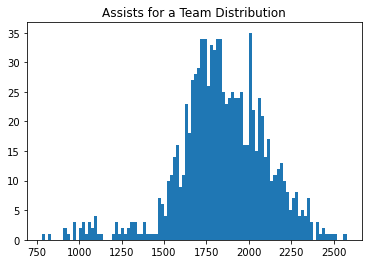

' try building a ML model to predict success - try to minimize error rate '

In [7]:
assists_by_team = players_df[['AST', 'TbY']].groupby(players_df.TbY).sum()
tby_mask = (players_df.groupby(players_df.TbY).count() > 13).Tm     # a team must have at least 14 players with data
plt.hist(assists_by_team[tby_mask], bins=100)
plt.title('Assists for a Team Distribution')
plt.show()
# print(players_df)
# TODO - there are teams with very large number of total assists - check if it makes sense
# maybe plot a histogram of assists_by_team
# print(assists_by_team[tby_mask].sort_values('AST'))


"""
build team_playing_by_team DF with normalized series for each interesting column by team - X matrix:
    AST -   sum
    MP  -   distribution - nuschat motivation: 1 - normalized std
    PTS -   distribution
    PA  -   distribution
    PF  -   distribution
index - <season>_<team_name>
"""

""" maybe - check correlation between the columns in X """

""" build y series - team success for each season """

""" check correlation for each colum in X with y """

""" hypothesis testing """

""" try building a ML model to predict success - try to minimize error rate """




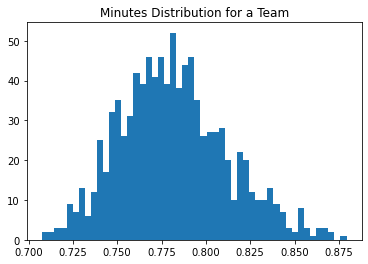

In [10]:
players_df['MpGnorm'] = players_df['MP'] / (players_df['G'] * 48)
minutes_distribution = 1 - players_df[['MpGnorm', 'TbY']].groupby(players_df.TbY).std()
# The large the std => the division of minutes in the team is smaller.
plt.hist(minutes_distribution[tby_mask], bins=50)
plt.title('Minutes Distribution for a Team')
plt.show()

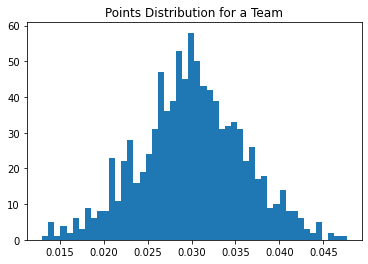

In [13]:
points_distribution = players_df[['PTS', 'TbY']].groupby(players_df.TbY).std()
norm_points_distribution = points_distribution / np.linalg.norm(points_distribution)
# The large the std => the division of minutes in the team is smaller.
plt.hist(norm_points_distribution[tby_mask], bins=50)
plt.title('Points Distribution for a Team')
plt.show()

In [660]:
players = pd.read_csv('Players.csv')
print(players)

      Unnamed: 0             Player  height  weight  \
0              0    Curly Armstrong   180.0    77.0   
1              1       Cliff Barker   188.0    83.0   
2              2      Leo Barnhorst   193.0    86.0   
3              3         Ed Bartels   196.0    88.0   
4              4        Ralph Beard   178.0    79.0   
...          ...                ...     ...     ...   
3917        3917      Troy Williams   198.0    97.0   
3918        3918       Kyle Wiltjer   208.0   108.0   
3919        3919  Stephen Zimmerman   213.0   108.0   
3920        3920        Paul Zipser   203.0    97.0   
3921        3921        Ivica Zubac   216.0   120.0   

                              collage    born      birth_city  \
0                  Indiana University  1918.0             NaN   
1              University of Kentucky  1921.0        Yorktown   
2            University of Notre Dame  1924.0             NaN   
3     North Carolina State University  1925.0             NaN   
4             

In [661]:
player_data = pd.read_csv('player_data.csv')
print(player_data)

                     name  year_start  year_end position height  weight  \
0          Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1         Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2     Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3      Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4       Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   
...                   ...         ...       ...      ...    ...     ...   
4545           Ante Zizic        2018      2018      F-C   6-11   250.0   
4546             Jim Zoet        1983      1983        C    7-1   240.0   
4547            Bill Zopf        1971      1971        G    6-1   170.0   
4548          Ivica Zubac        2017      2018        C    7-1   265.0   
4549           Matt Zunic        1949      1949      G-F    6-3   195.0   

             birth_date                                college  
0         June 24, 1968           

In [662]:
players = pd.read_csv('Players.csv')
print(players)

      Unnamed: 0             Player  height  weight  \
0              0    Curly Armstrong   180.0    77.0   
1              1       Cliff Barker   188.0    83.0   
2              2      Leo Barnhorst   193.0    86.0   
3              3         Ed Bartels   196.0    88.0   
4              4        Ralph Beard   178.0    79.0   
...          ...                ...     ...     ...   
3917        3917      Troy Williams   198.0    97.0   
3918        3918       Kyle Wiltjer   208.0   108.0   
3919        3919  Stephen Zimmerman   213.0   108.0   
3920        3920        Paul Zipser   203.0    97.0   
3921        3921        Ivica Zubac   216.0   120.0   

                              collage    born      birth_city  \
0                  Indiana University  1918.0             NaN   
1              University of Kentucky  1921.0        Yorktown   
2            University of Notre Dame  1924.0             NaN   
3     North Carolina State University  1925.0             NaN   
4             

In [663]:
player_data = pd.read_csv('player_data.csv')
print(player_data)

                     name  year_start  year_end position height  weight  \
0          Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1         Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2     Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3      Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4       Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   
...                   ...         ...       ...      ...    ...     ...   
4545           Ante Zizic        2018      2018      F-C   6-11   250.0   
4546             Jim Zoet        1983      1983        C    7-1   240.0   
4547            Bill Zopf        1971      1971        G    6-1   170.0   
4548          Ivica Zubac        2017      2018        C    7-1   265.0   
4549           Matt Zunic        1949      1949      G-F    6-3   195.0   

             birth_date                                college  
0         June 24, 1968           

In [5]:
players = pd.read_csv('Players.csv')
print(players)

      Unnamed: 0             Player  height  weight  \
0              0    Curly Armstrong   180.0    77.0   
1              1       Cliff Barker   188.0    83.0   
2              2      Leo Barnhorst   193.0    86.0   
3              3         Ed Bartels   196.0    88.0   
4              4        Ralph Beard   178.0    79.0   
...          ...                ...     ...     ...   
3917        3917      Troy Williams   198.0    97.0   
3918        3918       Kyle Wiltjer   208.0   108.0   
3919        3919  Stephen Zimmerman   213.0   108.0   
3920        3920        Paul Zipser   203.0    97.0   
3921        3921        Ivica Zubac   216.0   120.0   

                              collage    born      birth_city  \
0                  Indiana University  1918.0             NaN   
1              University of Kentucky  1921.0        Yorktown   
2            University of Notre Dame  1924.0             NaN   
3     North Carolina State University  1925.0             NaN   
4             

In [6]:
player_data = pd.read_csv('player_data.csv')
print(player_data)

                     name  year_start  year_end position height  weight  \
0          Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1         Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2     Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3      Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4       Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   
...                   ...         ...       ...      ...    ...     ...   
4545           Ante Zizic        2018      2018      F-C   6-11   250.0   
4546             Jim Zoet        1983      1983        C    7-1   240.0   
4547            Bill Zopf        1971      1971        G    6-1   170.0   
4548          Ivica Zubac        2017      2018        C    7-1   265.0   
4549           Matt Zunic        1949      1949      G-F    6-3   195.0   

             birth_date                                college  
0         June 24, 1968           